# 
Задание: скользящие средние на биржевых графиках
Используя данные индекса РТС за последние годы
https://video.ittensive.com/python-advanced/rts-index.csv
постройте отдельные графики закрытия (Close) индекса по дням за 2017, 2018, 2019 годы в единой оси X.
Добавьте на график экспоненциальное среднее за 20 дней для значения Max за 2017 год.
Найдите последнюю дату, когда экспоненциальное среднее максимального дневного значения (Max) в 2017 году было больше, чем соответствующее значение Close в 2019 году (это последнее пересечение графика за 2019 год и графика для среднего за 2017 год).
После какого дня 2019 года индекс РТС по закрытию окончательно превысил максимальные показатели за аналогичный день 2017 года? 19 февраля

C:\Users\User\AppData\Local\Temp\ipykernel_12108\1293805729.py:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_2019 = data["2019"].reset_index().set_index("Day")
C:\Users\User\AppData\Local\Temp\ipykernel_12108\1293805729.py:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_2017 = data["2017"].reset_index().set_index("Day")["Max"].ewm(span=20).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_12108\1293805729.py:20: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data["2017"].re

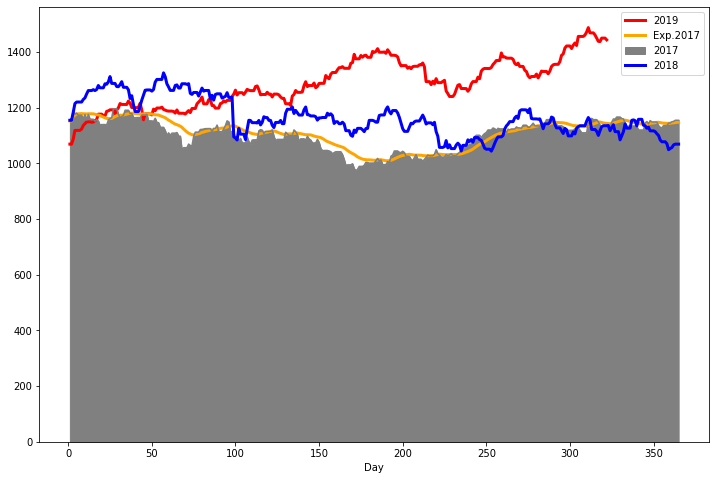

DatetimeIndex(['2019-02-19'], dtype='datetime64[ns]', name='Date', freq=None)


C:\Users\User\AppData\Local\Temp\ipykernel_12108\1293805729.py:24: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data_fall = data_2019[data_2019["Close"] < data_2017[0:len(data_2019)]]


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://video.ittensive.com/python-advanced/rts-index.csv")
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)
dates = pd.date_range(min(data["Date"]), max(data["Date"]))
data = data.set_index("Date")
data = data.reindex(dates).ffill()
data["Day"] = pd.to_datetime(data.index).dayofyear
data.index.name = "Date"
data = data.sort_index()
data_2019 = data["2019"].reset_index().set_index("Day")
data_2017 = data["2017"].reset_index().set_index("Day")["Max"].ewm(span=20).mean()

fig = plt.figure(figsize=(12,8))
area = fig.add_subplot(1, 1, 1)
data_2019["Close"].plot(ax=area, color="red", label="2019", lw=3)
data_2017.plot(ax=area, color="orange", label="Exp.2017", lw=3)
data["2017"].reset_index().set_index("Day")["Close"].plot.area(ax=area, color=".5", label="2017")
data["2018"].reset_index().set_index("Day")["Close"].plot(ax=area, color="blue", label="2018", lw=3)
plt.legend()
plt.show()
data_fall = data_2019[data_2019["Close"] < data_2017[0:len(data_2019)]]
data_fall.set_index("Date", inplace=True)
data_fall = data_fall.sort_index(ascending=False)
print (data_fall.head(1).index)